In [2]:
# import
from cifardef import *
from resnet import *
from PIL import Image  
import torch,math,os
from torch import optim
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
PATH='ResNet1.pkl'
model = ResNet18()
if os.path.isfile(PATH):
    model.load_state_dict(torch.load(PATH))
    print(model.eval())
else:
    print('No model')
cuda_gpu = torch.cuda.is_available()
if cuda_gpu:
    model = model.cuda()

ResNet(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (layer1): Sequential(
    (0): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inplace=True)
        (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (shortcut): Sequential()
    )
    (1): ResidualBlock(
      (left): Sequential(
        (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (2): ReLU(inp

In [9]:
batch_size = 128
learning_rate = 0.1
num_epoches = 1000
transform = transforms.Compose(
    [
        transforms.ToTensor(),
#         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),  #先四周填充0，在吧图像随机裁剪成32*32
    transforms.RandomHorizontalFlip(),  #图像一半的概率翻转，一半的概率不翻转
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)), #R,G,B每层的归一化用到的均值和方差
])

transform_test = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])
# train_dataset = cifar_10('data/cifar-10-batches-py',train=True, transform=transform,index=2)
test_dataset = cifar_10('data/cifar-10-batches-py',
                        train=False, transform=transform_test)
meta=unpickle('data/cifar-10-batches-py/batches.meta')
# train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

train_datasetList = [ cifar_10('data/cifar-10-batches-py',
                         train=True, transform=transform_train,index=i+1) for i in range(5)]
train_loaderList=[DataLoader(t, batch_size=batch_size, shuffle=True) for t in train_datasetList]

# 定义loss和optimizer
criterion = nn.CrossEntropyLoss()
# optimizer = optim.SGD(model.parameters(), lr=learning_rate)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9, weight_decay=5e-4) #优化方式为mini-batch momentum-SGD，并采用L2正则化（权重衰减）


log=open(PATH.split('.')[0]+'.log','a')
best_acc=float(test(model, 1, criterion, test_loader)[0])


Test set: Average loss: 0.4529, Accuracy: 9203/10000 (92%)


In [4]:
res={}
epoch=1

In [ ]:
epochs1=135
epochs2=185
epochs3=240
epochs=epochs3

optimizer = optim.SGD(model.parameters(), lr=0.1)
while epoch<=epochs1:
    print('Train Epoch: {}/{}: lr = {}'.format(epoch,epochs,0.1))
    print('Train Epoch: {}/{}:'.format(epoch,epochs),file=log)
    for t in train_loaderList:
        train(model,num_epoches,criterion,optimizer,t,file=log)
    if(epoch%(1)==0):
        res[epoch]={}
        acc, loss = test(model, 1, criterion, test_loader,log)
        res[epoch]['epoch']=epoch
        res[epoch]['acc']=float(acc)
        res[epoch]['loss']=float(loss)
        if acc>best_acc:
            best_acc=acc
            print('better model,saved as',PATH)
            torch.save(model.state_dict(),PATH)
    epoch+=1
optimizer = optim.SGD(model.parameters(), lr=0.01)

while epoch<=epochs2:
    print('Train Epoch: {}/{}: lr = {}'.format(epoch,epochs,0.01))
    print('Train Epoch: {}/{}:'.format(epoch,epochs),file=log)
    for t in train_loaderList:
        train(model,num_epoches,criterion,optimizer,t,file=log)
    if(epoch%(1)==0):
        res[epoch]={}
        acc, loss = test(model, 1, criterion, test_loader,log)
        res[epoch]['epoch']=epoch
        res[epoch]['acc']=float(acc)
        res[epoch]['loss']=float(loss)
        if acc>best_acc:
            best_acc=acc
            print('better model,saved as',PATH)
            torch.save(model.state_dict(),PATH)
    epoch+=1

optimizer = optim.SGD(model.parameters(), lr=0.001)

while epoch<=epochs3:
    print('Train Epoch: {}/{}: lr = {}'.format(epoch,epochs,0.001))
    print('Train Epoch: {}/{}:'.format(epoch,epochs),file=log)
    for t in train_loaderList:
        train(model,num_epoches,criterion,optimizer,t,file=log)
    if(epoch%(1)==0):
        res[epoch]={}
        acc, loss = test(model, 1, criterion, test_loader,log)
        res[epoch]['epoch']=epoch
        res[epoch]['acc']=float(acc)
        res[epoch]['loss']=float(loss)
        if acc>best_acc:
            best_acc=acc
            print('better model,saved as',PATH)
            torch.save(model.state_dict(),PATH)  
    epoch+=1
log.close()

In [ ]:
torch.save(model.state_dict(), PATH)

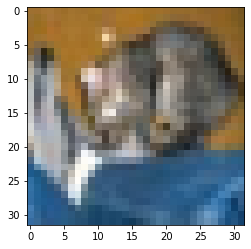

b'cat' , b'cat'


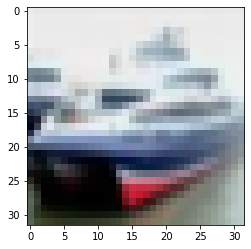

b'ship' , b'ship'


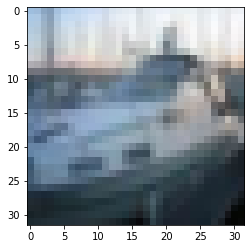

b'ship' , b'ship'


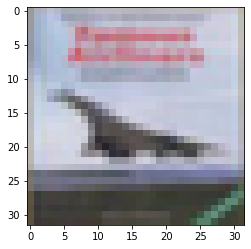

b'airplane' , b'airplane'


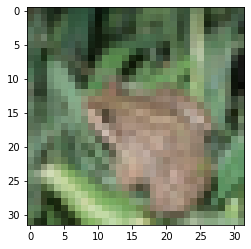

b'frog' , b'frog'


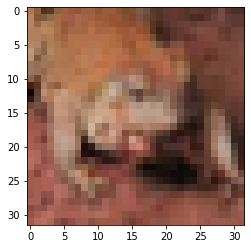

b'frog' , b'frog'


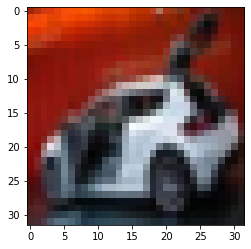

b'automobile' , b'automobile'


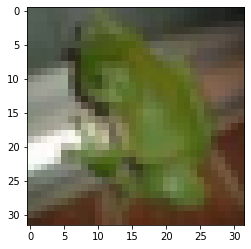

b'frog' , b'frog'


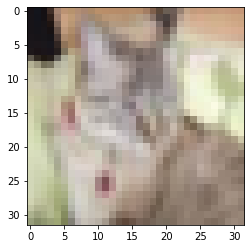

b'cat' , b'cat'


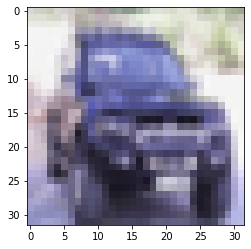

b'automobile' , b'automobile'


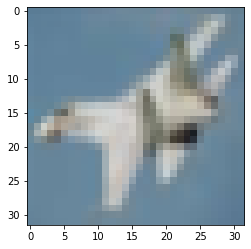

b'airplane' , b'airplane'


KeyboardInterrupt: 

In [5]:
test_visual(model,'data/cifar-10-batches-py',meta,transform_test)

In [8]:
float(test(model, 1, criterion, test_loader)[0])


Test set: Average loss: 0.4529, Accuracy: 9203/10000 (92%)


0.9203000068664551

In [7]:
pd.DataFrame(res).transpose()

NameError: name 'res' is not defined

In [ ]:
log.close()